In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style("whitegrid")

#Appling Algorithms
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [4]:
#read the data
data= pd.read_csv('/content/fraudTest.csv')

In [ ]:
#check the data
print("Credit Card Fraud Detection data -  rows:",data.shape[0]," columns:", data.shape[1])

Credit Card Fraud Detection data -  rows: 271489  columns: 23


In [ ]:
data.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,SC,29209,33.9659,-80.9355,333497.0,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,UT,84002,40.3207,-110.4360,302.0,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,NY,11710,40.6729,-73.5365,34496.0,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,FL,32780,28.5697,-80.8191,54767.0,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,MI,49632,44.2529,-85.0170,1126.0,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271489 entries, 0 to 271488
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             271489 non-null  int64  
 1   trans_date_trans_time  271489 non-null  object 
 2   cc_num                 271489 non-null  int64  
 3   merchant               271489 non-null  object 
 4   category               271489 non-null  object 
 5   amt                    271489 non-null  float64
 6   first                  271489 non-null  object 
 7   last                   271489 non-null  object 
 8   gender                 271489 non-null  object 
 9   street                 271489 non-null  object 
 10  city                   271489 non-null  object 
 11  state                  271489 non-null  object 
 12  zip                    271489 non-null  int64  
 13  lat                    271489 non-null  float64
 14  long                   271489 non-nu

In [ ]:
pd.set_option("display.float", "{:.2f}".format)
data.describe()

In [ ]:
data.isnull().sum().sum()

0

In [ ]:
data.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
# frac is percentage of the data that will be returned
data = data.sample(frac = 0.2, random_state = 1)
print(data.shape)

(10860, 23)


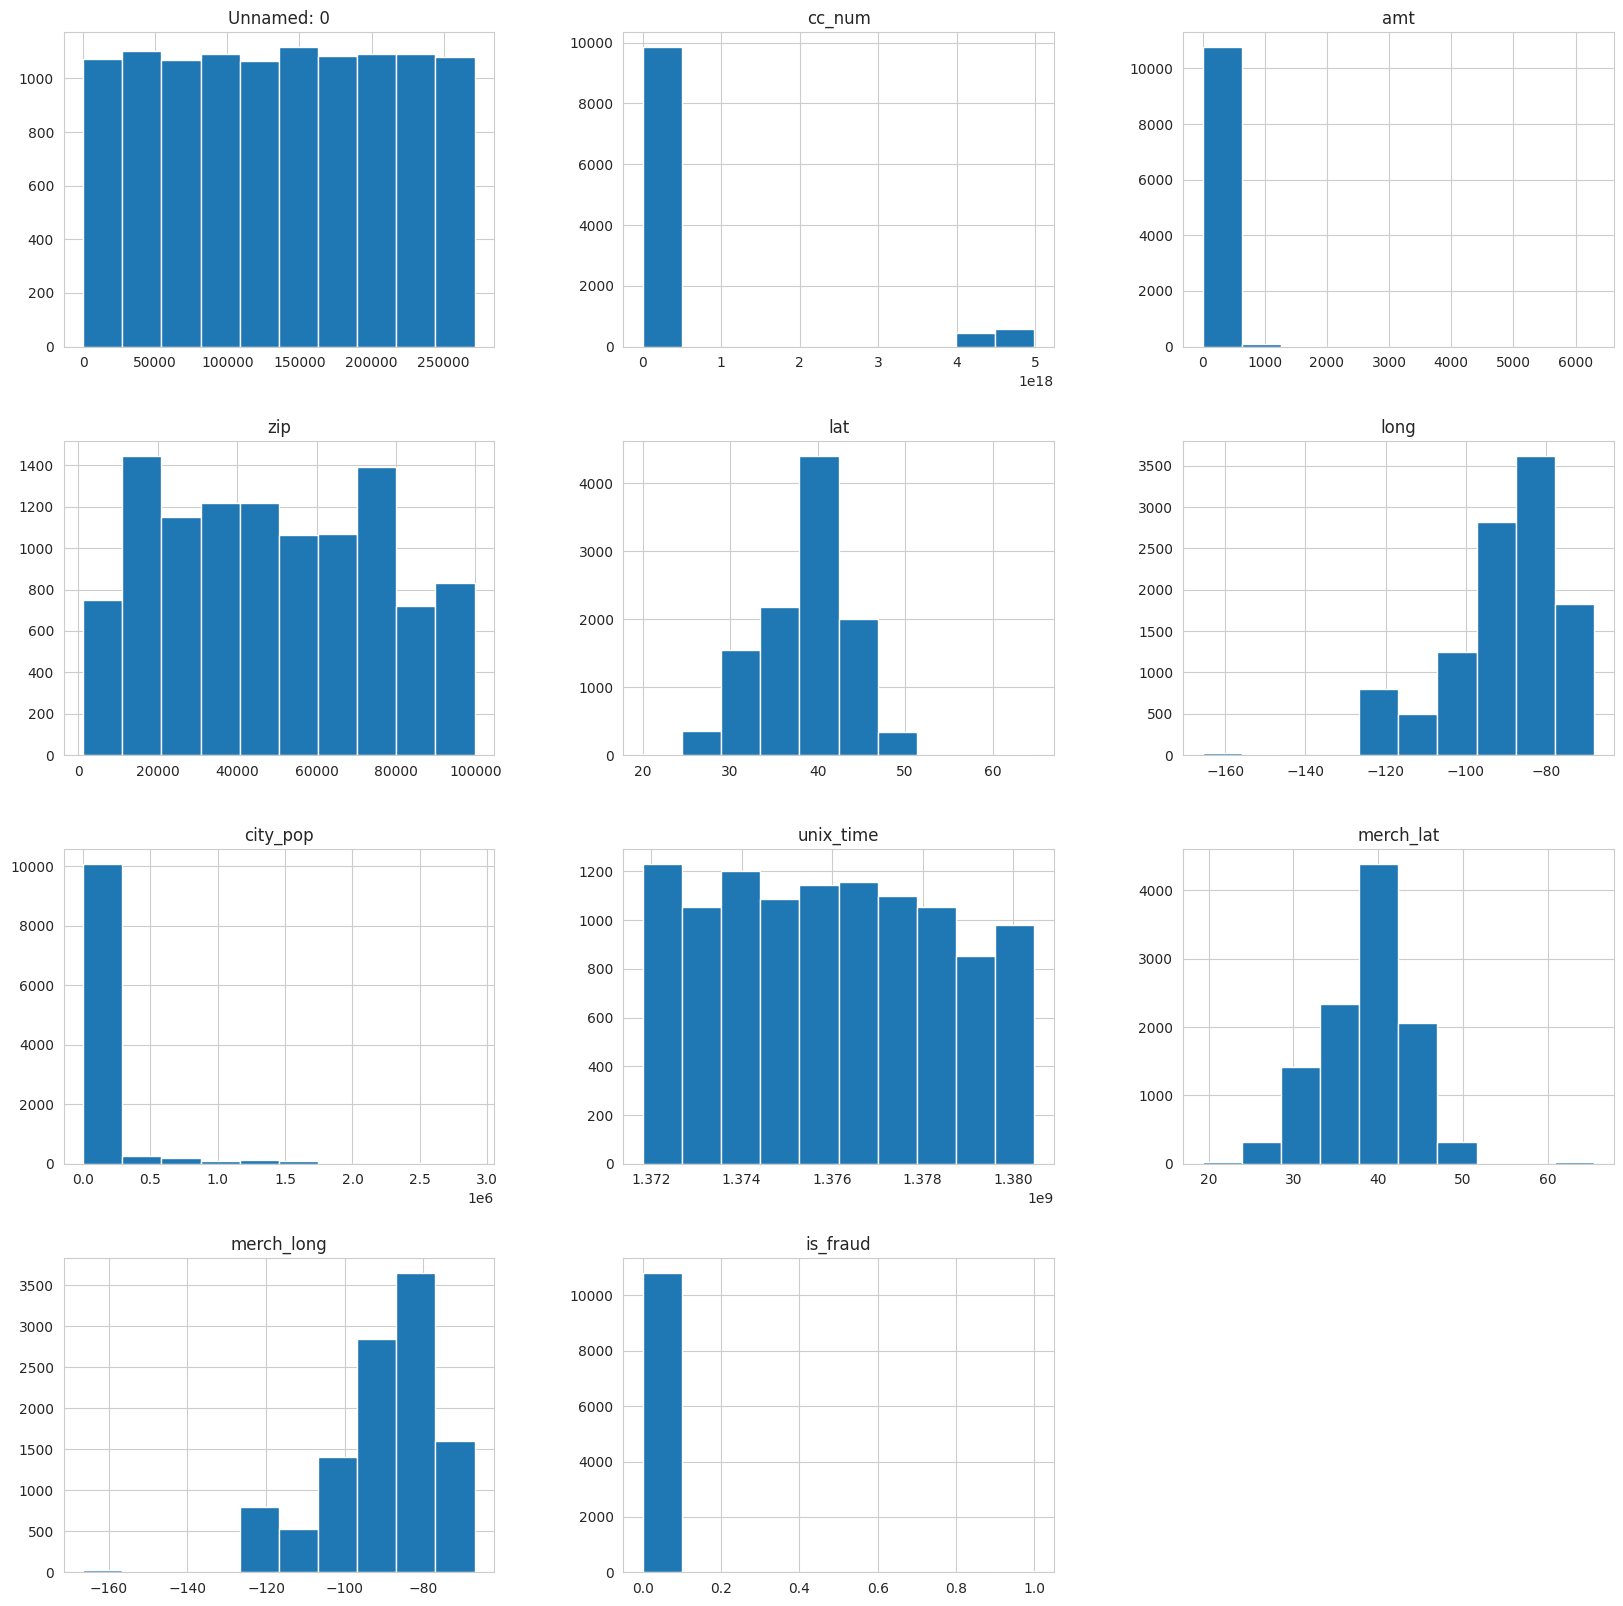

In [ ]:
# plot the histogram of each parameter
data.hist(figsize = (20, 20))
plt.show()

In [10]:
#Preprocessing
data["trans_date_trans_time"] = pd.to_datetime(data["trans_date_trans_time"])
data["dob"] = pd.to_datetime(data["dob"])
data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,319,10,2.86,Jeff,Elliott,1,351 Darlene Green,...,33.9659,-80.9355,333497.0,275,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,591,10,29.84,Joanne,Williams,0,3638 Marsh Union,...,40.3207,-110.4360,302.0,391,1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,611,5,41.28,Ashley,Lopez,0,9333 Valentine Point,...,40.6729,-73.5365,34496.0,259,1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,222,9,60.05,Brian,Williams,1,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767.0,406,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,292,13,3.19,Nathan,Massey,1,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,196,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190166,190166,2020-08-26 18:52:51,375974680629816,53,12,4.23,Roberta,Mccarthy,0,94431 Matthew Mall Suite 296,...,41.6611,-73.0449,2376.0,216,1973-04-06,47ab06160cb16a59ebcb509c67111734,1.377543e+09,41.260514,-73.204674,0.0
190167,190167,2020-08-26 18:54:17,36721445180895,465,10,37.93,Cesar,Smith,1,901 Ariel Points,...,42.4999,-74.6117,1666.0,125,1968-07-01,33187e6d4fc15bd0ca41441920f4c93a,1.377543e+09,41.908309,-74.883838,0.0
190168,190168,2020-08-26 18:55:37,4586260469584,683,7,7.34,Melody,Thompson,0,0362 Anderson Wall,...,40.1362,-95.2138,1631.0,29,1953-01-20,be1aa9780ff9491bbfdd2a501cb9166a,1.377543e+09,40.834433,-95.782059,0.0
190169,190169,2020-08-26 18:55:47,6011366578560244,458,1,18.44,Adam,Stark,1,0912 Mark Fields Apt. 080,...,40.5046,-77.7186,4653.0,301,1997-07-01,537c070c66398c2254017ca14cf1ddfa,1.377543e+09,39.645647,-77.399045,0.0


In [19]:
data.drop(columns=['Unnamed: 0','cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time'],inplace=True)
train_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767.0,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190166,190166,2020-08-26 18:52:51,375974680629816,"fraud_Bins, Balistreri and Beatty",shopping_pos,4.23,Roberta,Mccarthy,F,94431 Matthew Mall Suite 296,...,41.6611,-73.0449,2376.0,Herpetologist,1973-04-06,47ab06160cb16a59ebcb509c67111734,1.377543e+09,41.260514,-73.204674,0.0
190167,190167,2020-08-26 18:54:17,36721445180895,fraud_Osinski Inc,personal_care,37.93,Cesar,Smith,M,901 Ariel Points,...,42.4999,-74.6117,1666.0,Diagnostic radiographer,1968-07-01,33187e6d4fc15bd0ca41441920f4c93a,1.377543e+09,41.908309,-74.883838,0.0
190168,190168,2020-08-26 18:55:37,4586260469584,"fraud_Yost, Schamberger and Windler",kids_pets,7.34,Melody,Thompson,F,0362 Anderson Wall,...,40.1362,-95.2138,1631.0,Architect,1953-01-20,be1aa9780ff9491bbfdd2a501cb9166a,1.377543e+09,40.834433,-95.782059,0.0
190169,190169,2020-08-26 18:55:47,6011366578560244,fraud_O'Hara-Wilderman,food_dining,18.44,Adam,Stark,M,0912 Mark Fields Apt. 080,...,40.5046,-77.7186,4653.0,Nutritional therapist,1997-07-01,537c070c66398c2254017ca14cf1ddfa,1.377543e+09,39.645647,-77.399045,0.0


In [24]:
#Drop all rows that contain missing values
data.dropna(inplace=True)
data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,319,10,2.86,1,33.9659,-80.9355,333497.0,275,1.371817e+09,33.986391,-81.200714,0.0
1,591,10,29.84,0,40.3207,-110.4360,302.0,391,1.371817e+09,39.450498,-109.960431,0.0
2,611,5,41.28,0,40.6729,-73.5365,34496.0,259,1.371817e+09,40.495810,-74.196111,0.0
3,222,9,60.05,1,28.5697,-80.8191,54767.0,406,1.371817e+09,28.812398,-80.883061,0.0
4,292,13,3.19,1,44.2529,-85.0170,1126.0,196,1.371817e+09,44.959148,-85.884734,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
190165,679,6,6.20,1,42.0737,-78.0594,239.0,372,1.377543e+09,43.043848,-78.893748,0.0
190166,53,12,4.23,0,41.6611,-73.0449,2376.0,216,1.377543e+09,41.260514,-73.204674,0.0
190167,465,10,37.93,1,42.4999,-74.6117,1666.0,125,1.377543e+09,41.908309,-74.883838,0.0
190168,683,7,7.34,0,40.1362,-95.2138,1631.0,29,1.377543e+09,40.834433,-95.782059,0.0


In [30]:
encoder = LabelEncoder()
data["merchant"] = encoder.fit_transform(data["merchant"])
data["category"] = encoder.fit_transform(data["category"])
data["gender"] = encoder.fit_transform(data["gender"])
data["job"] = encoder.fit_transform(data["job"])

In [31]:
data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,319,10,2.86,1,33.9659,-80.9355,333497.0,275,1.371817e+09,33.986391,-81.200714,0.0
1,591,10,29.84,0,40.3207,-110.4360,302.0,391,1.371817e+09,39.450498,-109.960431,0.0
2,611,5,41.28,0,40.6729,-73.5365,34496.0,259,1.371817e+09,40.495810,-74.196111,0.0
3,222,9,60.05,1,28.5697,-80.8191,54767.0,406,1.371817e+09,28.812398,-80.883061,0.0
4,292,13,3.19,1,44.2529,-85.0170,1126.0,196,1.371817e+09,44.959148,-85.884734,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
190165,679,6,6.20,1,42.0737,-78.0594,239.0,372,1.377543e+09,43.043848,-78.893748,0.0
190166,53,12,4.23,0,41.6611,-73.0449,2376.0,216,1.377543e+09,41.260514,-73.204674,0.0
190167,465,10,37.93,1,42.4999,-74.6117,1666.0,125,1.377543e+09,41.908309,-74.883838,0.0
190168,683,7,7.34,0,40.1362,-95.2138,1631.0,29,1.377543e+09,40.834433,-95.782059,0.0


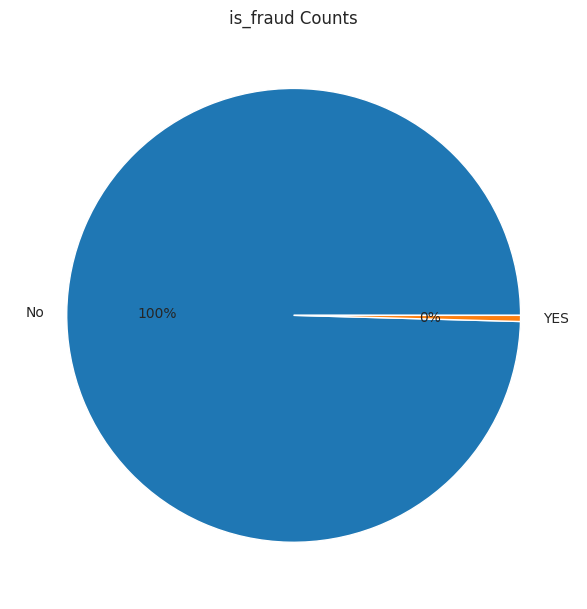

In [25]:
#EDA
exit_counts = data["is_fraud"].value_counts()
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # Subplot for the pie chart
plt.pie(exit_counts, labels=["No", "YES"], autopct="%0.0f%%")
plt.title("is_fraud Counts")
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

In [27]:
X = data.drop(columns=["is_fraud"], inplace = False)
Y = data["is_fraud"]

In [51]:
from sklearn.svm import SVC
model = SVC()
model.fit(X, Y)

SVC()

In [61]:
model.score(X, Y)

0.9956722932113372

In [54]:
data.dropna(inplace=True)
data


,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,319,10,2.86,1,33.9659,-80.9355,333497.0,275,1.371817e+09,33.986391,-81.200714,0.0
1,591,10,29.84,0,40.3207,-110.4360,302.0,391,1.371817e+09,39.450498,-109.960431,0.0
2,611,5,41.28,0,40.6729,-73.5365,34496.0,259,1.371817e+09,40.495810,-74.196111,0.0
3,222,9,60.05,1,28.5697,-80.8191,54767.0,406,1.371817e+09,28.812398,-80.883061,0.0
4,292,13,3.19,1,44.2529,-85.0170,1126.0,196,1.371817e+09,44.959148,-85.884734,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
190165,679,6,6.20,1,42.0737,-78.0594,239.0,372,1.377543e+09,43.043848,-78.893748,0.0
190166,53,12,4.23,0,41.6611,-73.0449,2376.0,216,1.377543e+09,41.260514,-73.204674,0.0
190167,465,10,37.93,1,42.4999,-74.6117,1666.0,125,1.377543e+09,41.908309,-74.883838,0.0
190168,683,7,7.34,0,40.1362,-95.2138,1631.0,29,1.377543e+09,40.834433,-95.782059,0.0


In [55]:
#Test the data
test_data = pd.read_csv("/content/fraudTest.csv")
test_data

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497.0,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1.371817e+09,33.986391,-81.200714,0.0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302.0,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1.371817e+09,39.450498,-109.960431,0.0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496.0,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1.371817e+09,40.495810,-74.196111,0.0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767.0,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1.371817e+09,28.812398,-80.883061,0.0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126.0,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1.371817e+09,44.959148,-85.884734,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190166,190166,2020-08-26 18:52:51,375974680629816,"fraud_Bins, Balistreri and Beatty",shopping_pos,4.23,Roberta,Mccarthy,F,94431 Matthew Mall Suite 296,...,41.6611,-73.0449,2376.0,Herpetologist,1973-04-06,47ab06160cb16a59ebcb509c67111734,1.377543e+09,41.260514,-73.204674,0.0
190167,190167,2020-08-26 18:54:17,36721445180895,fraud_Osinski Inc,personal_care,37.93,Cesar,Smith,M,901 Ariel Points,...,42.4999,-74.6117,1666.0,Diagnostic radiographer,1968-07-01,33187e6d4fc15bd0ca41441920f4c93a,1.377543e+09,41.908309,-74.883838,0.0
190168,190168,2020-08-26 18:55:37,4586260469584,"fraud_Yost, Schamberger and Windler",kids_pets,7.34,Melody,Thompson,F,0362 Anderson Wall,...,40.1362,-95.2138,1631.0,Architect,1953-01-20,be1aa9780ff9491bbfdd2a501cb9166a,1.377543e+09,40.834433,-95.782059,0.0
190169,190169,2020-08-26 18:55:47,6011366578560244,fraud_O'Hara-Wilderman,food_dining,18.44,Adam,Stark,M,0912 Mark Fields Apt. 080,...,40.5046,-77.7186,4653.0,Nutritional therapist,1997-07-01,537c070c66398c2254017ca14cf1ddfa,1.377543e+09,39.645647,-77.399045,0.0


In [56]:
test_data.drop(columns=['Unnamed: 0','cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time'],inplace=True)
test_data

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,fraud_Kirlin and Sons,personal_care,2.86,M,33.9659,-80.9355,333497.0,Mechanical engineer,1.371817e+09,33.986391,-81.200714,0.0
1,fraud_Sporer-Keebler,personal_care,29.84,F,40.3207,-110.4360,302.0,"Sales professional, IT",1.371817e+09,39.450498,-109.960431,0.0
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,40.6729,-73.5365,34496.0,"Librarian, public",1.371817e+09,40.495810,-74.196111,0.0
3,fraud_Haley Group,misc_pos,60.05,M,28.5697,-80.8191,54767.0,Set designer,1.371817e+09,28.812398,-80.883061,0.0
4,fraud_Johnston-Casper,travel,3.19,M,44.2529,-85.0170,1126.0,Furniture designer,1.371817e+09,44.959148,-85.884734,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
190166,"fraud_Bins, Balistreri and Beatty",shopping_pos,4.23,F,41.6611,-73.0449,2376.0,Herpetologist,1.377543e+09,41.260514,-73.204674,0.0
190167,fraud_Osinski Inc,personal_care,37.93,M,42.4999,-74.6117,1666.0,Diagnostic radiographer,1.377543e+09,41.908309,-74.883838,0.0
190168,"fraud_Yost, Schamberger and Windler",kids_pets,7.34,F,40.1362,-95.2138,1631.0,Architect,1.377543e+09,40.834433,-95.782059,0.0
190169,fraud_O'Hara-Wilderman,food_dining,18.44,M,40.5046,-77.7186,4653.0,Nutritional therapist,1.377543e+09,39.645647,-77.399045,0.0


In [57]:

# Update the X_test with the processed test data
X_test = test_data

In [62]:
X_test = data.drop(columns=["is_fraud"], inplace = False)
Y_test = data["is_fraud"]

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
190165    0.0
190166    0.0
190167    0.0
190168    0.0
190169    0.0
Name: is_fraud, Length: 190170, dtype: float64

In [ ]:
y_pred = model.predict(X_test)
y_pred


array([0., 0., 0., ..., 0., 0., 0.])

In [63]:
Y_test

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
190165    0.0
190166    0.0
190167    0.0
190168    0.0
190169    0.0
Name: is_fraud, Length: 190170, dtype: float64